#Business Problem :
It is estimated that 9.3% of the population in the United States have diabetes , 28% of which are undiagnosed. The 30-day readmission rate of diabetic patients is 14.4 to 22.7 % . Estimates of readmission rates beyond 30 days after hospital discharge are even higher, with over 26 % of diabetic patients being readmitted within 3 months and 30 % within 1 year.
Costs associated with the hospitalization of diabetic patients in the USA were \$124 billion, of which an estimated \$25 billion was attributable to 30-day readmissions assuming a 20% readmission rate. Therefore, reducing 30-day readmissions of patients with diabetes has the potential to greatly reduce healthcare costs while simultaneously improving care.


#Performace Metrics

<p>
Performance Metrics :
Our task is a classification problem so we can use performance metrics like precision, recall, Accuracy and F1-score. <br> <br>
1)Precision : <br>
Precision is (TP/TP+FP) where TP True Positive and FP is False Positive We can think of precision as out of all points that are predicted as positive points by model how many of them are indeed positive points. Precision is a good measure when False positive cost is high which is the case here in our case study. For a patient which doesn't need readmission if our model predicts that the patient needs readmission that is False positive then the hospital will keep that patient in the hospital and that increases
hospitalization cost. <br> <br>
2) Recall : <br>
Recall is (TP/TP + FN) where TP is True Positive and FN is False Negative We can think of Recall as out of all points that are actually positive how many of them are predicted to be positive by model. Recall is used when False Negative cost is high that is indeed the case here. For the patient which needs readmission if the model predicts that it doesn't then the hospital will discharge him but the patient will eventually readmit again
and that increases the cost. <br> <br>
3) Harmonic F1-Score : <br>
As from above we know that False Negative cost and False Positive cost both
are important for us so it would be good if we have a measure which combines both.
F1-score does the same for us; it combines Recall and Precision into single equation. <br>
<p style="font-style: italic;" > F1_score = (2 * Precision * Recall) /(Precision + Recall) </p>
</p>

<p>
There is problem of imbalance data in our case. After careful analysis we found that micro, macro F1 score are not useful to deal with imbalanced data. The harmonic mean of precision and recall is taken to deal with trade off between precision and recall. Here, We are in the same situation we want F1_score corresponding to majority class should not dominate our performace metric so we can consider taking harmonic mean of F1_scores of individual classes.

 Harmonic_F1_score = (2 * F1_class0 * F1_class1) / (F1_class0 + F1_class1)
</p> <br>

4)AUC : <br>
<p>
Normal precision and recall are calculated using single threshold. This single threshold might not classifye all points correctly. AUC is nothing but area under the ROC curve, ROC curve is drawn by calculating FPR and TPR and putting them on x and y axis respectively. So AUC takes all possible thresholds while calculating FPR and TPR lists and hence reveals us the real power of our model.We will AUC as one of our performace metric.
</p>

In [219]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "drive/My Drive/case_study1.zip" "case_study1.zip"
!unzip case_study1.zip

Archive:  case_study1.zip
  inflating: description.pdf         
  inflating: diabetic_data.csv       


In [221]:
!cp "drive/My Drive/data_checkpoint.csv" "data_checkpoint.csv"
data_checkpoint = pd.read_csv('data_checkpoint.csv')
data_checkpoint.drop(['Unnamed: 0'], inplace = True, axis = 1)
data = data_checkpoint.copy()

#Data Preprocessing

In [ ]:
data = pd.read_csv('diabetic_data.csv')
data.head(2).T

,0,1
encounter_id,2278392,149190
patient_nbr,8222157,55629189
race,Caucasian,Caucasian
gender,Female,Female
age,[0-10),[10-20)
weight,?,?
admission_type_id,6,1
discharge_disposition_id,25,1
admission_source_id,1,7
time_in_hospital,1,3


1) Age Feature :<br>
<ul>                                                                             The values of age are given like [0-10),[10-20),[20-30) The age feature is not categorical but ordinal and hence we should convert it to numbers and treat it as numeric feature. We are converting age feature like below, <br>
                [0-10) -->  1 <br>
                [10-20) --> 2 <br>
                [20-30) ---> 3 <br>
</ul> 

In [ ]:
print(np.unique(data['age']))

replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

data['age'] = data['age'].apply(lambda x : replaceDict[x])
print(data['age'].head())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


2)Dealing with Duplicate Records : <br>
<ul>
     We found out that, for some patient there are number of entries in the dataset these duplicate entries are not helpful in solving the task hence lets remove these entries.
</ul>




In [ ]:
data.dropna(inplace = True)
print('Total data = ', len(data))
print('Unique entries = ', len(np.unique(data['patient_nbr'])))
data.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(data))

Total data =  101766
Unique entries =  71518
Length after removing Duplicates: 71518


3)Dealing with Missing Values : 
<ul>
    There are number of feature with missing values lets analyze them so that we can replace them using appropriate technique like replacing with class mean/median, checking wheather missing value is source of information, missing value replacement using ML model
</ul>

In [ ]:
t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])
for col in data.columns :
    lenn = len(data[data[col] == '?'])
    t.add_row([col,lenn,lenn / len(data)])
print(t)

+--------------------------+----------------+-----------------------+
|       Column Name        | Missing Values |   Missing Percentage  |
+--------------------------+----------------+-----------------------+
|       encounter_id       |       0        |          0.0          |
|       patient_nbr        |       0        |          0.0          |
|           race           |      1948      |  0.027237898151514305 |
|          gender          |       0        |          0.0          |
|           age            |       0        |          0.0          |
|          weight          |     68665      |   0.960107944853044   |
|    admission_type_id     |       0        |          0.0          |
| discharge_disposition_id |       0        |          0.0          |
|   admission_source_id    |       0        |          0.0          |
|     time_in_hospital     |       0        |          0.0          |
|        payer_code        |     31043      |   0.434058558684527   |
|    medical_special

After research we found that medical_specialty is important feature however it has too many distinct values so when we apply one hot encoding it will unneccessarily create lots of features. To group them into smaller number of categories we used frequency based approach and domain knowledege like all kind of surgons should be put under 'surgon' category. <br>

<p>
We failed to group below medical specialist so we grouped them into 'ungrouped' category. <br>
Endocrinology -- glands <br>
Gastroenterology --stomach <br>
Gynecology -- women reproduction system <br>
Hematology -- Blood <br>
Hematology/Oncology -- Blood <br>
Hospitalist -- one who takes care of admitted patients <br>
Oncology -- cancer <br>
Ophthalmology -- eye <br>
otolaryngology -- ears, nose, and throat <br>
Pulmonology -- respiratory <br>
radiology -- diagnosing and treating injuries and diseases using medical imaging (radiology) procedures (exams/tests) such as X-rays <br>
</p>

In [ ]:
high_frequency = ['InternalMedicine', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General', 'Orthopedics', 'Orthopedics-Reconstructive', 
                 'Emergency/Trauma', 'Urology','ObstetricsandGynecology','Psychiatry','Pulmonology ','Nephrology','Radiologist']

low_frequency = ['Surgery-PlasticwithinHeadandNeck','Psychiatry-Addictive','Proctology','Dermatology','SportsMedicine','Speech','Perinatology',\
                'Neurophysiology','Resident','Pediatrics-Hematology-Oncology','Pediatrics-EmergencyMedicine','Dentistry','DCPTEAM','Psychiatry-Child/Adolescent',\
                'Pediatrics-Pulmonology','Surgery-Pediatric','AllergyandImmunology','Pediatrics-Neurology','Anesthesiology','Pathology','Cardiology-Pediatric',\
                'Endocrinology-Metabolism','PhysicianNotFound','Surgery-Colon&Rectal','OutreachServices',\
                'Surgery-Maxillofacial','Rheumatology','Anesthesiology-Pediatric','Obstetrics','Obsterics&Gynecology-GynecologicOnco']

pediatrics = ['Pediatrics','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology','Pediatrics-Hematology-Oncology',\
               'Pediatrics-Neurology','Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Cardiology-Pediatric', 'Surgery-Pediatric']

psychic = ['Psychiatry-Addictive', 'Psychology', 'Psychiatry',  'Psychiatry-Child/Adolescent', 'PhysicalMedicineandRehabilitation', 'Osteopath']


neurology = ['Neurology', 'Surgery-Neuro',  'Pediatrics-Neurology', 'Neurophysiology']


surgery = ['Surgeon', 'Surgery-Cardiovascular', \
          'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial', \
             'Surgery-Plastic', 'Surgery-PlasticwithinHeadandNeck',  'Surgery-Thoracic',\
             'Surgery-Vascular', 'SurgicalSpecialty', 'Podiatry']
             
ungrouped = ['Endocrinology','Gastroenterology','Gynecology','Hematology','Hematology/Oncology','Hospitalist','InfectiousDiseases',\
           'Oncology','Ophthalmology','Otolaryngology','Pulmonology','Radiology']


missing = ['?']

colMedical = []

for val in data['medical_specialty'] :
    if val in pediatrics :
        colMedical.append('pediatrics')
    elif val in psychic :
        colMedical.append('psychic')
    elif val in neurology :
        colMedical.append('neurology')
    elif val in surgery :
        colMedical.append('surgery')
    elif val in high_frequency :
        colMedical.append('high_freq')
    elif val in low_frequency :
        colMedical.append('low_freq')
    elif val in ungrouped :
        colMedical.append('ungrouped')
    elif val in missing :
        colMedical.append('missing')

data['medical_specialty'] = colMedical
 

Lets deal with diag_1 , diag_2 and diag_3 one by one

As featues diag_1 , diag_2, diag_3 have mixed type values like 11,  'V25' 'V26' 'V43'
So we here cant apply class mean, median so lets try replacing missing valuse with 
most common value

In [ ]:

diag_1 = Counter(list(data['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(data['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(data['diag_3'])).most_common(1)[0][0]

data['diag_1'] = data['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
data['diag_2'] = data['diag_1'].apply(lambda x : diag_2 if x == '?' else x)
data['diag_3'] = data['diag_3'].apply(lambda x : diag_3 if x == '?' else x)


 <p>The diag_1 , diag_2 , diag_3 are categorical features but they have 
 lots unique values if we apply one hot encoding directely it will results in
 lots of feature values that will eventually invoke "curse of dimensionality" problem
 We will use the domain knowledge provided in the description of data to create fewer values.</p>

Domain Knowledge <br>
Type    -->         ICD Values -->      Description 

Circulatory    -->    390–459, 785   -->  Diseases of the circulatory system <br>
Respiratory   -->     460–519, 786   -->  Diseases of the respiratory system <br>
Digestive     -->     520–579, 787    --> Diseases of the digestive system <br>
Diabetes   -->        250.xx    -->       Diabetes mellitus <br>
Injury    -->          800–999    -->      Injury and poisoning <br>
Musculoskeletal -->    710–739 -->         Diseases of the musculoskeletal system and connective tissue <br>
Genitourinary     --> 580–629, 788   -->  Diseases of the genitourinary system <br>
Neoplasms       -->   140–239  -->        Neoplasms <br>
Pregnecy       -->    630–679  -->        Complications of pregnancy, childbirth, and the puerperium <br>
Other <br>

<p>We added Pregnecy as one category original description file kept it in 'Other' category but from research we found that 
Pregnecy creates unique type of diabetes and hence it  make sense to keep it as seperate category. </p>

In [ ]:
 
print(len(np.unique(data['diag_1'])))  
print(len(np.unique(data['diag_2'])))  
print(len(np.unique(data['diag_3'])))  

data['diag_1'] = data['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

data['diag_2'] = data['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

data['diag_3'] = data['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))  

print(np.unique(data['diag_1']), '\n')           
print(np.unique(data['diag_2']), '\n')
print(np.unique(data['diag_3']), '\n')                         

696
696
758
['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 



Readmission rate is also dependant on weather patients family is poor or rich. Poor people tend to discharge early due to financial reason so when they discharge early there is more chance that patient might readmit. We are hoping that Payer code might capture this information and help us get good results.

4)Readmitted column :
<ul>
    Redmitted column has values like '>30' that is patient readmitted after 30 days and 'NO' that is patient not readmitted and '<30' that is patient readmitted before 30 days <br>
    lets replace '>30'/'NO' with 0 and '<30' with 1
</ul>


In [ ]:
print('BEFORE : ',np.unique(data['readmitted'].values))

data['readmitted'] = data['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)

print('AFTER : ',np.unique(data['readmitted'].values))

BEFORE :  ['<30' '>30' 'NO']
AFTER :  [0 1]


# Data Analysis and Feature Engineering:

<p> We can clearly see the data is imbalanced. We will deal with it while implementing models. </p>

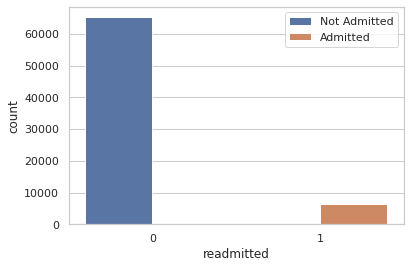

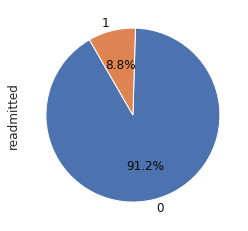

In [ ]:
##  
plt.figure()
sns.set_theme(style="whitegrid")
ax = sns.countplot(x = 'readmitted', data = data, hue = 'readmitted')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels = ['Not Admitted', 'Admitted'])
plt.figure()
data.readmitted.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})


<p>lets analyse each and every feature one by one :
encouter_id and patient_nbr features are kept just to distinguish between records these are not helpful at all 
in our analysis. lets remove them </p>

In [ ]:
data.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace = True)
data.drop(data[data.gender == 'Unknown/Invalid'].index, inplace = True)

<p>
If the frequency of person's visit to the hospital is 
high then we can think of that person to be less healthier 
and less healthier patient tends to readmit quickly
lets create health_index variable.Higher the health_index lesser the chance that person will readmit (indirectely propotional)<br>
Health_index = ( 1 / (number_emergency + number_inpatient + number_outpatient) ) <br> <br>
 </p>

<p>
Severity of disease is high if patient is spending lots of time in hospital and going through number of complicated test so, lets create severity of disease as feature. To get probablistic interpretation lets divide it by total values.
<br>
   severity_of_disease = (time_in_hospital + num_procedures + num_medications + num_lab_procedures + number_of_diagnoses) </p> <br>

<p>
 Research has found that the patient which keep going through changes(up/down) in proportion of medications is tend to readmit so we have engineered new variable called as 'number_of_changes'. This captures number of  medications whose proportion have changed for each patient.
</p>

In [ ]:
### lets analyse numeric features 
from tqdm import tqdm

data['health_index'] = data.apply(lambda x:  1 / (x['number_emergency'] + x['number_inpatient'] + x['number_outpatient'])
                                  if x['number_emergency'] != 0 or x['number_inpatient'] != 0 or x['number_outpatient'] != 0
                                  else 1, axis = 1)



total = data['time_in_hospital'].sum() + data['num_procedures'].sum() + \
                              data['num_medications'].sum() + data['num_lab_procedures'].sum() + \
                              data['number_diagnoses'].sum()

data['severity_of_disease'] = (data['time_in_hospital'] + data['num_procedures'] + \
                              data['num_medications'] + data['num_lab_procedures'] + \
                              data['number_diagnoses']) / total

drugList = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',\
            'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',\
            'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',\
            'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']


number_of_changes = []
for i in tqdm(range(len(data))) :
    changeCount = 0
    for col in drugList : 
        if data.iloc[i][col] in ['Down', 'Up'] :
            changeCount += 1
    number_of_changes.append(changeCount)

data['number_of_changes'] = number_of_changes

100%|██████████| 71515/71515 [03:51<00:00, 308.77it/s]


In [ ]:
data.drop(['weight', 'payer_code'], axis = 1, inplace = True)   ## change here

As we can see that weight has pretty high percentage of missing values lets remove it.

Discharge Disposiiton ID <br>
<p>
Discharge Disposition ID corresponding to [11 or 13 or 14 or 19 or 20 or 21] indicates patient has expired so there is no chance that it will readmit again so we will remove these records.
<p>

<p>
Discharge Disposition ID has lots of distinct values using domain knowledge we will convert them into small number of categories. <br>

ddi_cat1 = [6, 8, 9, 13] <br>
ddi_cat2 = [3, 4, 5, 14, 22, 23, 24] <br>
ddi_cat10 = [12, 15, 16, 17] <br>
ddi_cat11 = [19, 20, 21] <br>
ddi_cat18 = [25, 26] <br>
</p>

In [ ]:
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

data = data[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

Admission Type ID :
<p>
Similarly Admission Type ID can be converted into small number of categories <br>
ati_cat1 = [2, 7] <br>
ati_cat5 = [6, 8]
</p>

In [ ]:
data['admission_type_id'] = data['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [6, 8]
                                                            else int(x) ))

Admission Source ID :
<p>
Similarly Admission Source ID can be converted into small number of categories <br>
asi_cat1 = [2, 3] <br>
ati_cat4 = [5, 6, 10, 22, 25] <br>
ati_cat9 = [15, 17, 20, 21] <br>
ati_cat11 = [13, 17]
</p>

In [ ]:
data['admission_source_id'] = data['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

Glucose Serum test : <br>
A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes. <br>

'>200' : 200 = indicates diabetes <br>
'>300' : 300 = Indicates diabetes <br>
'Norm' : 100 = Normal <br>
'None' : 0 = test was not taken <br>

In [ ]:
data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

A1C test : <br>
An A1C test is a blood test that reflects your average blood glucose levels over the past 3 months <br>

'>7' : 7 <br>
'>8' : 8 <br>
Norm : 5 = Normal <br>
None : 0 = Test was not taken

In [ ]:
data['A1Cresult'] = data['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))

In [ ]:
for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    data[col] = data[col].apply(lambda x : 10 if x == 'Up' 
                                              else ( -10 if x == 'Down'                                                          
                                              else ( 0 if x == 'Steady'
                                              else  -20)))


data['change'] = data['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)


data['diabetesMed'] = data['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)



In [ ]:
data_checkpoint = data.copy()     ### saving the data to avoid redoing things again and again

In [222]:
""" Missing values of race will be handled using model imputation"""
data = data_checkpoint.copy()
race = data['race'] 
data.drop(['race'], axis = 1, inplace = True)

In [ ]:
#data['race'] = data['race'].apply(lambda x : np.nan if x == '?' else x)
#data["race"].fillna(data["race"].mode()[0], inplace = True)

<p>
 
Check for the categorical columns which are statistically significant using chisquared test
We keep signifance level/alpha as 0.35 that if there is 65% chance that feature is important we keep that feature in our feature set. 
</p>



In [223]:
#'number_emergency', 

numeric_features = ['age','time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
                    'health_index', 'severity_of_disease', 'number_of_changes', 'A1Cresult', 'max_glu_serum', 
                    'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',\
            'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',\
            'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',\
            'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone', 'change', 'diabetesMed']


categorical_features = []
rejected_features = []

for col in data.columns :
    if col not in numeric_features :
        categorical_features.append(col)

for col in categorical_features : 
    data_crosstab = pd.crosstab(data['readmitted'],  
                                data[col], 
                                margins = False) 

    stat, p, dof, expected = scipy.stats.chi2_contingency(data_crosstab)
    if p < 0.4 :
	    print(p, col, 'is significant')
    else:
        print(p, col, 'is not significant')
        rejected_features.append(col)

#rejected_features.remove('admission_type_id')
print('\n\n', rejected_features)
data.drop(rejected_features, axis = 1, inplace = True)

0.5649365136977416 gender is not significant
0.018235268523518786 admission_type_id is significant
1.7670702961635e-182 discharge_disposition_id is significant
0.14913091739439216 admission_source_id is significant
1.6017605412957235e-06 medical_specialty is significant
7.047139731365279e-16 diag_1 is significant
7.047139731365279e-16 diag_2 is significant
1.8929103548343518e-07 diag_3 is significant
0.0 readmitted is significant


 ['gender']


<p>Lets use spearsman correlation coefficient to check weather numeric features and
   readmitted column are dependant or independant if some features are found to be independant 
   on readmitted we will simply remove them </p>

<p>As we can see that correlation is always close to zero
but, spearman doesnt capture the non-linear relationships
so, rather than using correlation coeff we will use pvalue to get "rejected features list"
Here hypothesis testing is done assuming null hypothesis to be "variables are independant"
so assuming significance level = alpha = 0.35 if pvalue < alpha then reject null hypothesis 
that is we accept variables are dependant</p>

In [224]:
rejected_features = []
for col in numeric_features :
    rho , pval = scipy.stats.spearmanr(data['readmitted'], data[col])
    print(col, rho, pval)
    

print('\n\n')
for col in numeric_features :
    rho , pval = scipy.stats.spearmanr(data['readmitted'], data[col])
    if pval < 0.4 : 
        print(col, 'is significant')
    else : 
        print(col, 'is not significant')
        rejected_features.append(col)

#rejected_features.remove('max_glu_serum')
#rejected_features.remove('A1Cresult')
print(rejected_features)
## lets remove rejected_features
data.drop(rejected_features, axis = 1, inplace=True)

age 0.04699517679216786 9.763088866595248e-36
time_in_hospital 0.05865854050984207 9.88788178411997e-55
num_lab_procedures 0.03205313657980457 1.7609829498436774e-17
num_procedures 0.0037141294409280727 0.32429372315318505
num_medications 0.042222285096625414 3.6376441367407055e-29
number_outpatient 0.01601746179619878 2.127747332310953e-05
number_emergency 0.030398363931386705 7.082148759492669e-16
number_inpatient 0.08473011804528006 2.282652550803581e-112
number_diagnoses 0.041698289703234574 1.7372423993096614e-28
health_index -0.059116808233520196 1.4569669084834509e-55
severity_of_disease 0.04806287810890338 2.6561107236329494e-37
number_of_changes 0.023429199496016746 5.016715550160748e-10
A1Cresult -0.00938585138161347 0.012741758088728836
max_glu_serum 0.009266702006536386 0.013921431822441098
metformin -0.012307695913182955 0.0010892989066281955
repaglinide 0.013893369427945397 0.0002266892755126597
nateglinide -0.0036143033427687714 0.33746793782562867
chlorpropamide -0.0052

In [ ]:
#data_explore = data.copy()
#data_explore['race'] = race
#data_explore.to_csv('data_explore.csv')

In [225]:
""" 
On categorical variable we will use one hot encoding technques
"""
cat_new = []
for col in categorical_features :
    if col in data.columns :
        print(col, '-->', np.unique(data[col]), '\n')
        cat_new.append(col)

numeric_features = []

for col in data.columns :
    if col  not in cat_new :
        numeric_features.append(col)

admission_type_id --> [1 3 4 5] 

discharge_disposition_id --> [ 1  2  7 10 18 27 28] 

admission_source_id --> [ 1  4  7  8  9 11] 

medical_specialty --> ['high_freq' 'low_freq' 'missing' 'neurology' 'pediatrics' 'psychic'
 'surgery' 'ungrouped'] 

diag_1 --> ['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

diag_2 --> ['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

diag_3 --> ['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

readmitted --> [0 1] 



<p>Lets fill the missing values of race using model based imputing </p>

In [239]:
print(Counter(y))

print(np.unique(y))

Counter({2: 52663, 0: 12692, 3: 1506, 4: 1160, 1: 491})
[0 1 2 3 4]


In [254]:
from sklearn import preprocessing

#data2 = data.copy()
data2 = data.copy()
data2 = pd.get_dummies(data2, columns = cat_new)
data2['race'] = race
#data2['readmitted'] = Y
data2.dropna(inplace = True)
data_trainn = data2[data2['race'] != '?']
data_testt = data2[data2['race'] == '?']

for col in numeric_features : 
    if col in data_trainn.columns :
        scalar = StandardScaler()
        scalar = scalar.fit(np.array(data_trainn[col]).reshape(-1, 1))
        col_train = scalar.transform(np.array(data_trainn[col]).reshape(-1, 1))
        col_test = scalar.transform(np.array(data_testt[col]).reshape(-1, 1))
        data_trainn[col] = col_train.flatten()
        data_testt[col] = col_test.flatten()


le = preprocessing.LabelEncoder()
oversample = RandomOverSampler(random_state = 12)
data_trainn['race'] = le.fit_transform(data_trainn['race'])
y = data_trainn['race']
data_trainn.drop(['race'], axis = 1, inplace = True)
data_testt.drop(['race'], axis = 1, inplace = True)
data2.drop(['race'], inplace = True, axis = 1)
x_train_race, x_test_race, y_train_race, y_test_race = train_test_split(data_trainn, y, stratify = y, test_size = 0.1)
x_train_race, y_train_race = oversample.fit_resample(x_train_race, y_train_race)

In [257]:
for n_ests in range(65, 120, 20) :
    for depth in range(25, 50, 6) :
        rf = RandomForestClassifier(n_estimators = n_ests, max_depth=depth, criterion = "gini", random_state = 23)
        rf.fit(x_train_race, y_train_race)
        print(n_ests, depth, accuracy_score(y_test_race, rf.predict(x_test_race)))


65 25 0.7532107413893754
65 31 0.7612375948628137
65 37 0.7637186223000584
65 43 0.7612375948628137
65 49 0.7644483362521891
85 25 0.7540863981319322
85 31 0.763426736719206
85 37 0.7638645650904845
85 43 0.7628429655575014
85 49 0.7667834208990076
105 25 0.7561295971978984
105 31 0.7637186223000584
105 37 0.7641564506713369
105 43 0.7644483362521891
105 49 0.7647402218330415


In [258]:
rf = RandomForestClassifier(n_estimators = 100, max_depth=25, criterion = "gini", random_state = 23)
rf.fit(data_trainn, y_trainn)
predicted = rf.predict(data_testt)
data_testt['race'] = predicted
data_trainn['race'] = y_trainn
data2 = pd.concat([data_testt, data_trainn], axis = 0);
race_df = pd.DataFrame(data2.race.values, index = data2.index)

race_df.columns = ['race']
data_new = pd.merge(data, race_df, right_index = True, left_index = True)


In [ ]:
data_brand_new = data_new.copy()
Y = data_brand_new['readmitted']
data_brand_new.drop(['readmitted'], axis = 1, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(data_brand_new, Y, stratify = Y, test_size = 0.1, random_state = 24)


In [ ]:
data_train_x, data_val_x, data_train_y, data_val_y = train_test_split(x_train, y_train, random_state = 24, \
                                                                      test_size = 0.1, stratify = y_train)
oversample = RandomOverSampler(random_state = 12)
data_trainn_x, data_trainn_y = oversample.fit_resample(data_train_x, data_train_y)
data_trainn_x = pd.DataFrame(data_trainn_x)
data_trainn_x.columns = data_val_x.columns

In [ ]:
## Arranging categorical features at the start

cat4 = cat_new.copy()
cat_train_x = pd.DataFrame()
cat_val_x = pd.DataFrame()
cat_test_x = pd.DataFrame()
cat_test_y = y_test

cat_train_x= data_trainn_x[cat4 + numeric_features]
cat_val_x = data_val_x[cat4 + numeric_features]
cat_test_x = x_test[cat4 + numeric_features]

In [ ]:
### setting optimum hyperparameters :
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=130,random_seed=42,learning_rate=0.02333333333333333 , \
            max_depth = 4, eval_metric = 'AUC', subsample = 0.7, metric_period=100, \
            min_data_in_leaf = ( len(cat_train_x) / 2 ), 
        )

clf.fit(cat_train_x, data_trainn_y, cat_features=range(len(cat4)), eval_set = (cat_val_x, data_val_y))

0:	test: 0.5998677	best: 0.5998677 (0)	total: 64.4ms	remaining: 8.31s
100:	test: 0.6284760	best: 0.6284760 (100)	total: 1.29s	remaining: 370ms
129:	test: 0.6311440	best: 0.6311440 (129)	total: 1.66s	remaining: 0us

bestTest = 0.6311439661
bestIteration = 129



In [ ]:
imp = []
for colName, importance in zip(cat_val_x.columns, clf.feature_importances_) :
    imp.append((colName, importance))

imp = [(key, val) for key, val in sorted(imp, key = lambda x : x[1], reverse = True)]

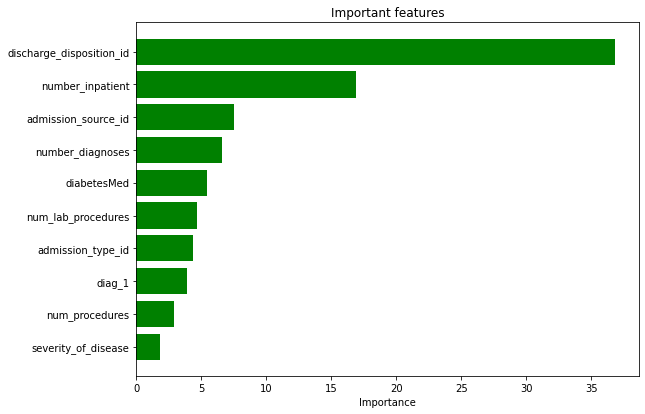

In [ ]:
imp1 = imp[0:10]
plt.figure(figsize=(9, 6.5))
plt.barh(range(len(imp1))[::-1], [x[1]  for x in imp1] , align='center', color = 'g')
plt.yticks(range(len(imp1))[::-1], [x[0]  for x in imp1], )
plt.xlabel('Importance')
plt.title('Important features')
plt.show()

Lets do the univariate and Bivariate analysis of important features :
<br> 1)Discharge Disposition ID : <br>
From the graph it clear that if discharge disposition id is 18 the patient wont readmit.

In [ ]:
data2 = data_explore.copy() 

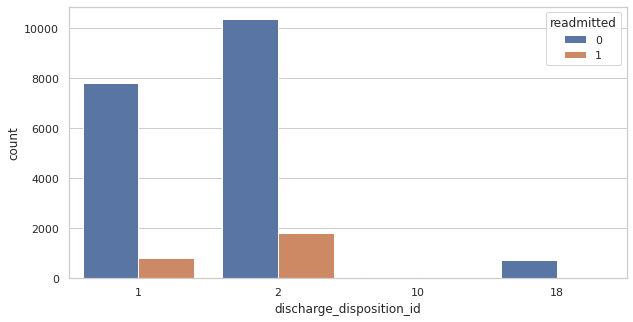

In [ ]:
fig = plt.figure(figsize = (10, 5))

sns.countplot(x  = 'discharge_disposition_id', data = data2, hue = 'readmitted')

2)Number Inpatient: 
<p> Most patient never admitted into the hospital and if patient has not admitted previously or admitted very few number of time there is very less chance that he will readmit.
</p>


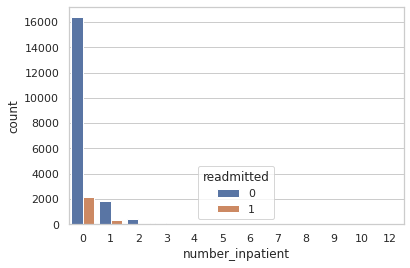

In [ ]:
sns.countplot(x  = 'number_inpatient', data = data2, hue = 'readmitted')

3)Admission Source ID : 
<p> 
Most of the patient who readmitted have admission source as 1 and so if some patient has source id as 1 he is more likely be going to readmit.
</p>

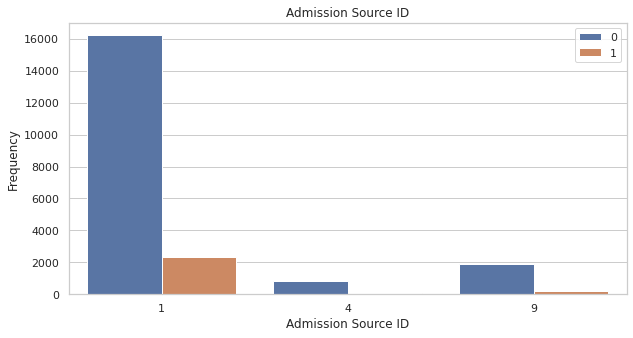

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
a = sns.countplot(x = 'admission_source_id', hue = 'readmitted', data = data2)


4)Number of Diagnoses :
                      <p> Distribution of number of diagnosis done by readmitted and not readmitted patient is almost the same hence we are not able to conclude anything from it.


Text(0.5, 1.0, 'Not Readmitted Patient')

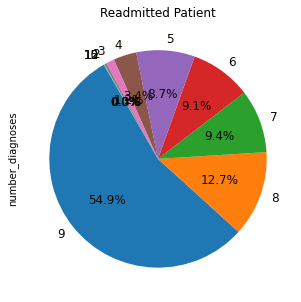

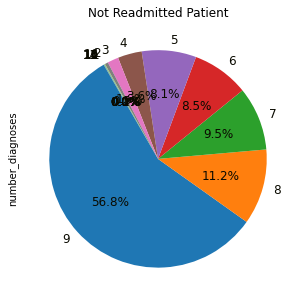

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
#a = sns.countplot(x = 'number_diagnoses', hue = 'readmitted', data = data2)


ax = data2[data2.readmitted == 1].number_diagnoses.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'},)
ax.set_title('Readmitted Patient')
fig = plt.figure(figsize = (10, 5)) 


ax = data2[data2.readmitted == 0].number_diagnoses.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'},)
ax.set_title('Not Readmitted Patient')


5)Diabetes Medication :
                      <p> This feature tells weather the patient has taken Diabetes Medication or not. In our dataset Number of patient taken Diabetes Medication and "readmitted" is almost same as number of patients taken Diabetes medication and "not readmitted".But the by iteracting with other feature Diabetes Med might reveal lot of information that is useful for given task.</p>

Text(0.5, 1.0, 'Not Readmitted Patient')

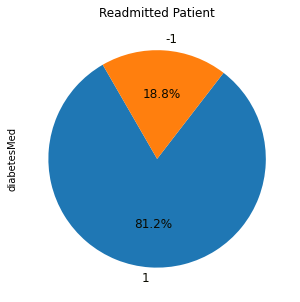

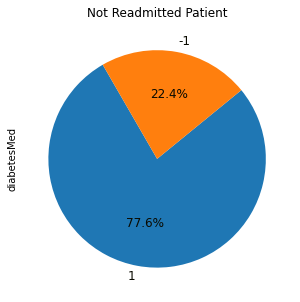

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
#a = sns.countplot(x = 'number_diagnoses', hue = 'readmitted', data = data2)


ax = data2[data2.readmitted == 1].diabetesMed.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'},)
ax.set_title('Readmitted Patient')
fig = plt.figure(figsize = (10, 5)) 


ax = data2[data2.readmitted == 0].diabetesMed.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'},)
ax.set_title('Not Readmitted Patient')

6)Number of lab procedure :
                      <p> Distribution Number of lab procedures for radmitted and not readmitted patient is exactely same. But it has high varience.High varience features are considered information rich features. </p>

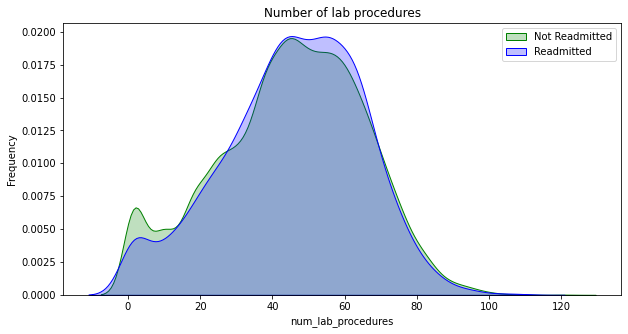

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
a = sns.kdeplot(data2.loc[(data2['readmitted'] == 0), "num_lab_procedures"] ,
                 color = "g", shade = True, label = "Not Readmitted")

a = sns.kdeplot(data2.loc[(data2['readmitted'] == 1), "num_lab_procedures"] ,
                 color = "b", shade = True, label = "Readmitted")

a.legend()
a.set_xlabel("num_lab_procedures")
a.set_ylabel("Frequency")
a.set_title("Number of lab procedures")
plt.show()

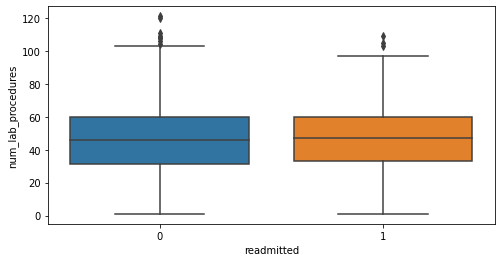

In [ ]:
fig = plt.figure(figsize = (8, 4))
sns.boxplot(x = 'readmitted', y = 'num_lab_procedures', data = data2)

7)Race 

In [ ]:
print(data2[data2.readmitted == 1].race.value_counts())

Caucasian          2131
AfricanAmerican     384
?                    66
Hispanic             52
Other                29
Asian                19
Name: race, dtype: int64


Text(0.5, 1.0, 'Not Readmitted Patient')

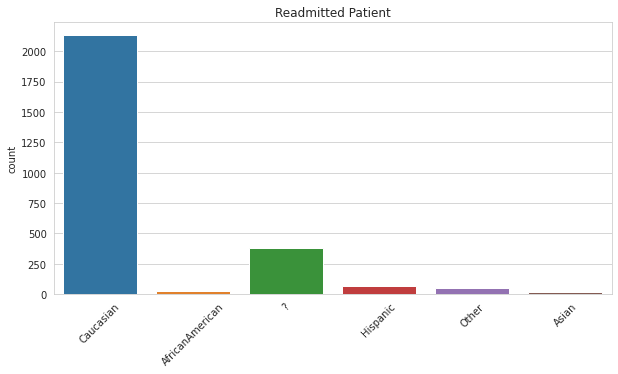

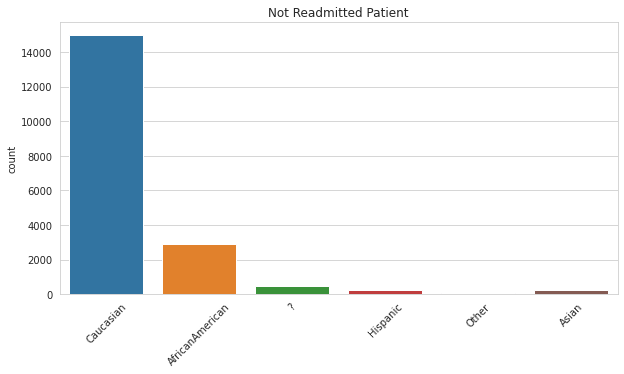

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
ax = fig.add_subplot(111)

sns.countplot(data2[data2.readmitted == 1].race.values)
ax.set_xticklabels(['Caucasian', 'AfricanAmerican', '?', 'Hispanic', 'Other', 'Asian'], rotation = 45)
ax.set_title('Readmitted Patient')

fig = plt.figure(figsize = (10, 5)) 
ax = fig.add_subplot(111)
sns.countplot(data2[data2.readmitted == 0].race.values)
ax.set_xticklabels(['Caucasian', 'AfricanAmerican', '?', 'Hispanic', 'Other', 'Asian'], rotation = 45)
ax.set_title('Not Readmitted Patient')



In [ ]:

new_df = pd.DataFrame()

for col in  ['number_inpatient', 'severity_of_disease','number_diagnoses','num_lab_procedures','num_procedures']:
    new_df[col] = data_new[col]

new_df['readmitted'] = data_new['readmitted']
print(new_df.head())

   number_inpatient  severity_of_disease  ...  num_procedures  readmitted
0                 0             0.000009  ...               0           0
1                 0             0.000014  ...               3           0
2                 0             0.000018  ...               0           1
3                 0             0.000020  ...               1           0
4                 0             0.000022  ...               5           0

[5 rows x 6 columns]


From graphs we can clearly see that the problem is strictly nonlinear 
as +ve and -ve data points are intermixed like crazy. Only complex non linear function
can solve the problem when considered only two features. If we want it to
solve it using two features we must go for mathematical transformation
hoping it might convert decision boundary from complex non linear to linear one.

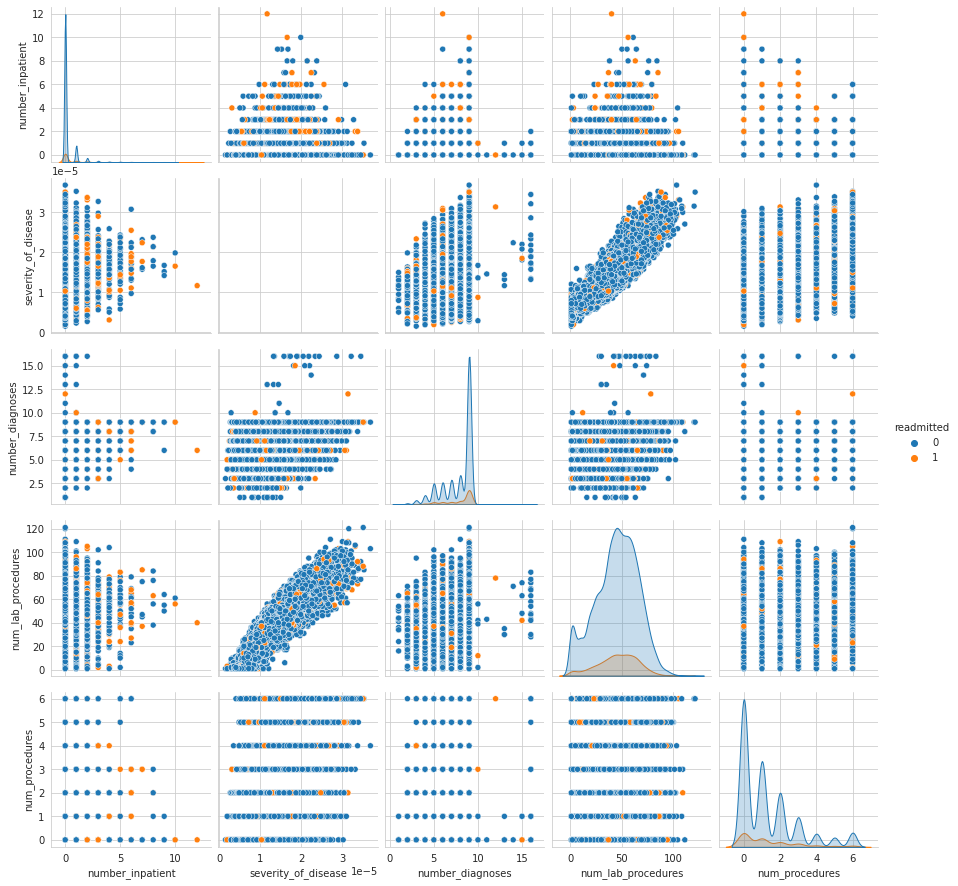

In [ ]:
sns.set_style('whitegrid')
#g.map(sns.pairplot, size = 3).add_legend()
sns.pairplot(new_df, hue = 'readmitted')


<p> We did careful bivariate analysis after performing transformation on features.We found following pair of features to be important as these pairs are giving insight about dependent variable (readmitted column)

Between Change and DiabetesMed : <br>

From pie chart it clear that if the patient has no changes in medication and has not taken any diabetic medication he has more chance of getting redmitted than the patient who has taken diabetesMed and has no changes in medication.

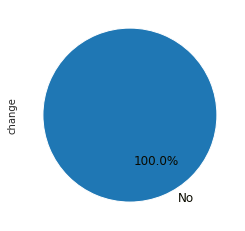

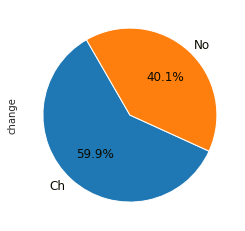

In [ ]:
fig = plt.figure()
ax = dataX[(dataX.readmitted == 0) & (dataX.diabetesMed == 'No')].change.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'},)

fig = plt.figure()
ax = dataX[(dataX.readmitted == 0) & (dataX.diabetesMed == 'Yes')].change.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'},)

Most of patient are having higher age. The patient who have readmitted tend to have higher age and higher time spend in the hospital. Not readmitted patient spending less time in the hospital.

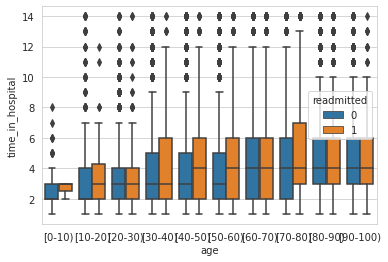

In [ ]:
dataX = pd.read_csv('diabetic_data.csv')
dataX['readmitted'] = dataX['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)
sns.boxplot(x='age', y = 'time_in_hospital', hue = 'readmitted', data = dataX)

Younger people tend to admit in the hospital more often. The patient who have readmitted have high number of inpatient feature value can be seen for group age [20-30]

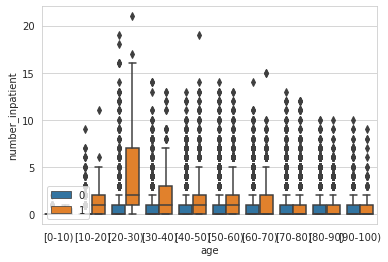

In [ ]:
ax = sns.boxplot(x='age', y = 'number_inpatient', hue = 'readmitted', data = dataX)
ax.legend(loc = 'lower left')

From pie chart we can infer that, If there is patient with source id = 4 and change feature has val as 'NO' then that patient has less chance of readmitting than the patient with admission id in [1, 9] and has no change.

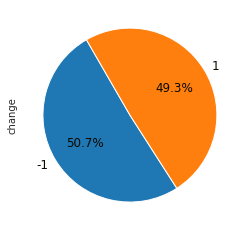

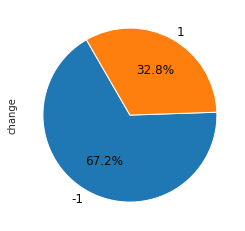

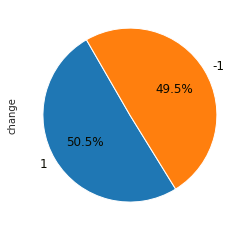

In [ ]:
fig = plt.figure()
ax = data2[(data2.readmitted == 0) & (data2.admission_source_id == 1)].change.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'},)

fig = plt.figure()
ax = data2[(data2.readmitted == 0) & (data2.admission_source_id == 4)].change.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'},)

fig = plt.figure()
ax = data2[(data2.readmitted == 0) & (data2.admission_source_id == 9)].change.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'},)

#Summary of EDA and FE

From the EDA we get to know that, The features like number of lab procedures, Diabetes Medication, admission are important in our task. By combining pairs like "change + DiabetesMed" , "age + time_in_hospital", "age + number_impatient" and "change + admission_source_id" can give us lots of information which is helpful in given task. <br>

We have tried model based imputation to fill the missing values but found out that the features with very less number of distinct values should be imputed with model based approach so we filled missing values of race features only with model based imputation. <br>

In feature engineering for columns like change, insulin, etc we have No , Up, Steady values but after experiments we found that it is good idea to convert them into numbers. <br>

First we kept the categorical values as it is but with this approach we were getting very low AUC so, we used domain knowledge to reduce the distinct categories of categorical features and that actually improved the accuracy. <br>

At start we had all the features included and most the features were not important to the given task. So we used Pearson Correlation Coefficient and Chi-Squared test to remove the unnecessary features and this actually improved our model's accuracy. <br>

#Different ML Algos :

#Logistic Regression 

In [ ]:
cat_new.remove('readmitted')

In [260]:
data_brand_new = data.copy()
data_brand_new = pd.get_dummies(data_brand_new, columns = cat_new )  
Y = data_brand_new.readmitted
data_brand_new.drop(['readmitted'], axis = 1, inplace = True)
x_train, x_test_lr, y_train, y_test_lr = train_test_split(data_brand_new, Y, stratify = Y, test_size = 0.1, random_state = 24)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test_lr = scaler.transform(x_test_lr)
x_train = pd.DataFrame(x_train)
x_test_lr = pd.DataFrame(x_test_lr)
x_train.columns = data_brand_new.columns

In [261]:
data_train_x, data_val_x, data_train_y, data_val_y = train_test_split(x_train, y_train, random_state = 24, \
                                                                      test_size = 0.1, stratify = y_train)
oversample = RandomOverSampler(random_state = 12)
data_trainn_x, data_trainn_y = oversample.fit_resample(data_train_x, data_train_y)
data_trainn_x = pd.DataFrame(data_trainn_x)
data_trainn_x.columns = data_val_x.columns

In [262]:
from sklearn.linear_model import SGDClassifier
for C in np.linspace(0.0001, 0.03, 30) :
    lr_model = SGDClassifier(alpha = C, learning_rate = 'adaptive', loss = 'log' , penalty = 'elasticnet', \
                             random_state = 24, class_weight = 'balanced', eta0 = 0.001,
                             early_stopping = True, n_iter_no_change = 3
                              )
    lr_model.fit(data_trainn_x, data_trainn_y)
    print(C, roc_auc_score(data_val_y, lr_model.predict_proba(data_val_x)[:, 1]))

0.0001 0.6510458396862695
0.0011310344827586208 0.6515658062174409
0.0021620689655172413 0.6519609073308854
0.0031931034482758623 0.6523905912683572
0.004224137931034483 0.6527217294594858
0.005255172413793104 0.6530329748757313
0.006286206896551725 0.6530348111318743
0.007317241379310346 0.6533212670901889
0.008348275862068965 0.6536781128673201
0.009379310344827587 0.6539498787764902
0.010410344827586206 0.6541582938487257
0.011441379310344828 0.6544217966052521
0.01247241379310345 0.6546736697395392
0.013503448275862069 0.6548830029398461
0.01453448275862069 0.6550381665839331
0.01556551724137931 0.6551226343665131
0.01659655172413793 0.655289274611494
0.017627586206896553 0.6553764967782887
0.018658620689655174 0.6554866721468711
0.019689655172413792 0.6556384693213626
0.020720689655172413 0.655772822062495
0.021751724137931035 0.6558448951161095
0.022782758620689656 0.6559214057887364
0.023813793103448277 0.6559682303203838
0.0248448275862069 0.6561111522568507
0.02587586206896551

In [263]:
lr_model = SGDClassifier(alpha = 0.02896896551724138, learning_rate = 'adaptive', loss = 'log' , penalty = 'elasticnet', \
                             random_state = 24, class_weight = 'balanced', eta0 = 0.001,
                             early_stopping = True, n_iter_no_change = 3
                              )
lr_model.fit(data_trainn_x, data_trainn_y)
predicted_prob = lr_model.predict_proba(x_test_lr)[:, 1]
predicted = lr_model.predict(x_test_lr)
AUC_LR = roc_auc_score(y_test_lr, predicted_prob)
print('AUC_LR = ', AUC_LR)
f1_pos = f1_score(y_test_lr, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test_lr], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_LR = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('HARMONIC_F1_LR = ', HARMONIC_F1_LR)

AUC_LR =  0.6534044933934898
F1_POS =  0.22583926754832148 F1_NEG =  0.7950444384594667
HARMONIC_F1_LR =  0.3517584864826567


#CatBoost

In [ ]:
data_brand_new = data.copy()
Y = data_brand_new['readmitted']
data_brand_new.drop('readmitted', inplace = True, axis = 1)
x_train, x_test, y_train, y_test = train_test_split(data_brand_new, Y, stratify = Y, test_size = 0.1, random_state = 24)

In [ ]:
data_train_x, data_val_x, data_train_y, data_val_y = train_test_split(x_train, y_train, random_state = 24, \
                                                                      test_size = 0.1, stratify = y_train)
oversample = RandomOverSampler(random_state = 12)
data_trainn_x, data_trainn_y = oversample.fit_resample(data_train_x, data_train_y)
data_trainn_x = pd.DataFrame(data_trainn_x)
data_trainn_x.columns = data_val_x.columns

In [ ]:
## Arranging categorical features at the start

cat4 = cat_new.copy()
cat_train_x = pd.DataFrame()
cat_val_x = pd.DataFrame()
cat_test_x = pd.DataFrame()
cat_test_y = y_test.copy()

cat_train_x= data_trainn_x[cat4 + numeric_features]
cat_val_x = data_val_x[cat4 + numeric_features]
cat_test_x = x_test[cat4 + numeric_features].copy()

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
catb_params={"iterations":range(100, 200, 15),
            "learning_rate" : np.linspace(0.01, 0.03, 10),
            "depth":[2, 4, 8]}

clf = CatBoostClassifier(iterations=130,random_seed=42,learning_rate=0.02333333333333333 , \
             subsample = 0.8, metric_period=100, \
            min_data_in_leaf = ( len(cat_train_x) / 2 ),
        )

catb_cv_model=GridSearchCV(clf,catb_params,cv = 2, scoring= 'roc_auc', n_jobs=-1,  verbose = 2)\
.fit(cat_train_x, data_trainn_y, cat_features=range(len(cat4)), eval_set = (cat_val_x, data_val_y))


Fitting 2 folds for each of 210 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 24.1min finished


0:	learn: 0.6913372	test: 0.6913476	best: 0.6913476 (0)	total: 115ms	remaining: 21.7s
100:	learn: 0.6323356	test: 0.6386943	best: 0.6386943 (100)	total: 5.26s	remaining: 4.63s
189:	learn: 0.6072792	test: 0.6229098	best: 0.6229098 (189)	total: 9.84s	remaining: 0us

bestTest = 0.6229097861
bestIteration = 189



In [ ]:
predicted_prob = catb_cv_model.best_estimator_.predict_proba(cat_test_x)[:, 1]
predicted = catb_cv_model.best_estimator_.predict(cat_test_x)
AUC_CAT = roc_auc_score(cat_test_y, predicted_prob)
print('AUC_CAT = ', AUC_CAT)
f1_pos = f1_score(cat_test_y, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in cat_test_y], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_CAT = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('HARMONIC_F1_CAT = ', HARMONIC_F1_CAT)

AUC_CAT =  0.650942309050603
F1_POS =  0.22088068181818182 F1_NEG =  0.8053584102200142
HARMONIC_F1_CAT =  0.3466796697524027


#Random Forest 

In [ ]:
#data_brand_new = data.copy()
data_brand_new = data.copy()
data_brand_new = pd.get_dummies(data_brand_new, columns = cat_new )   ### for cat model comment this
Y = data_brand_new['readmitted']
data_brand_new.drop(['readmitted'], axis = 1, inplace = True)
x_train, x_test_rf, y_train, y_test_rf = train_test_split(data_brand_new, Y, stratify = Y, test_size = 0.1, random_state = 24)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test_rf = scaler.transform(x_test_rf)
x_train = pd.DataFrame(x_train)
x_test_rf = pd.DataFrame(x_test_rf)
x_train.columns = data_brand_new.columns

In [ ]:
data_train_x, data_val_x, data_train_y, data_val_y = train_test_split(x_train, y_train, random_state = 24, \
                                                                      test_size = 0.1, stratify = y_train)
oversample = RandomOverSampler(random_state = 12)
data_trainn_x, data_trainn_y = oversample.fit_resample(data_train_x, data_train_y)
data_trainn_x = pd.DataFrame(data_trainn_x)
data_trainn_x.columns = data_val_x.columns

In [ ]:
rf = RandomForestClassifier(max_features = 'sqrt', max_samples = 0.8, class_weight = "balanced")

rf_params = {"max_depth": [5, 7, 10],
             "n_estimators": range(100, 250, 30)}

rf_cv_model = GridSearchCV(rf, rf_params, cv=2, n_jobs=-1, scoring = 'roc_auc', verbose=2).fit(data_trainn_x, data_trainn_y)
print(rf_cv_model.best_score_)
print(rf_cv_model.best_params_)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   58.6s finished


0.7545574150016535

In [ ]:
rf_model = rf_cv_model.best_estimator_
#rf_model.fit(data_trainn_x, data_trainn_y)
predicted_prob = rf_model.predict_proba(x_test_rf)[:, 1]
predicted = rf_model.predict(x_test_rf)
AUC_RF = roc_auc_score(y_test_rf, predicted_prob)
print('AUC_RF = ', AUC_RF)
f1_pos = f1_score(y_test_rf, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test_rf], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_RF = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('Harmonic_F1_RF =', HARMONIC_F1_RF)

AUC_RF =  0.6633526103243218
F1_POS =  0.23723723723723722 F1_NEG =  0.8221288515406163
Harmonic_F1_RF = 0.36821940867963326


#Decision Tree

In [ ]:
#data_brand_new = data.copy()
data_brand_new = data.copy()
data_brand_new = pd.get_dummies(data_brand_new, columns = cat_new )   ### for cat model comment this
Y = data_brand_new['readmitted']
data_brand_new.drop(['readmitted'], axis = 1, inplace = True)
x_train, x_test_dt, y_train, y_test_dt = train_test_split(data_brand_new, Y, stratify = Y, test_size = 0.1, random_state = 24)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test_dt = scaler.transform(x_test_dt)
x_train = pd.DataFrame(x_train)
x_test_dt = pd.DataFrame(x_test_dt)
x_train.columns = data_brand_new.columns

In [ ]:
data_train_x, data_val_x, data_train_y, data_val_y = train_test_split(x_train, y_train, random_state = 24, \
                                                                      test_size = 0.1, stratify = y_train)
oversample = RandomOverSampler(random_state = 12)
data_trainn_x, data_trainn_y = oversample.fit_resample(data_train_x, data_train_y)
data_trainn_x = pd.DataFrame(data_trainn_x)
data_trainn_x.columns = data_val_x.columns

In [ ]:
dt = DecisionTreeClassifier(max_features = 'sqrt', class_weight = "balanced", random_state = 34, splitter = 'best')

dt_params = {"max_depth": range(1, 100, 1),
              "min_samples_split" : range(2, 20, 1)}
dt_cv_model = GridSearchCV(dt, dt_params, cv=2, n_jobs=-1, scoring = 'roc_auc', verbose=2).fit(data_trainn_x, data_trainn_y)
dt_cv_model.best_score_

Fitting 2 folds for each of 1782 candidates, totalling 3564 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3557 out of 3564 | elapsed:  3.4min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 3564 out of 3564 | elapsed:  3.4min finished


0.9221751143331163

In [ ]:
dt_cv_model.best_params_

{'max_depth': 53, 'min_samples_split': 3}

In [ ]:
dt_model = dt_cv_model.best_estimator_
#rf_model.fit(data_trainn_x, data_trainn_y)
predicted_prob = dt_model.predict_proba(x_test_dt)[:, 1]
predicted = dt_model.predict(x_test_dt)
AUC_DT = roc_auc_score(y_test_dt, predicted_prob)
print('AUC_DT = ', AUC_DT)
f1_pos = f1_score(y_test_dt, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test_dt], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_DT = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('Harmonic_F1_DT =', HARMONIC_F1_DT)

AUC_DT =  0.5189480388645947
F1_POS =  0.12287793047696038 F1_NEG =  0.9155707727025134
Harmonic_F1_DT = 0.21667597332524668


#Custom Ensemble Model

1) Splitting whole dataset into train and test(80-20)


2) The 80% train set, I split into D1 and D2.(50-50). Now from D1 by doing sampling with replacement I have created d1,d2,d3....dk(k samples).Then we have created 'k' models and trained each of these models like model1 will be trained on d1 samples, model2 will be trained on d2 samples etc.


3) After passing D2 set to each of these k models, we will get k predictions for D2, from each of these k models.


4) Using these k predictions we have created a new dataset(tranformed D2), and for D2, we already know it's corresponding target values, so we trained a meta model with these k predictions.


5) Now for model evaluation, we have used the 20% data that we have kept as the test set.

In [407]:
#data_brand_new = data.copy()
data_brand_new = data.copy()
data_brand_new = pd.get_dummies(data_brand_new, columns = cat_new )   ### for cat model comment this
Y = data_brand_new['readmitted']
data_brand_new.drop(['readmitted'], axis = 1, inplace = True)
x_train, x_test_ce, y_train, y_test_ce = train_test_split(data_brand_new, Y, stratify = Y, test_size = 0.15, random_state = 24)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test_ce = scaler.transform(x_test_ce)
x_train = pd.DataFrame(x_train)
x_test_ce = pd.DataFrame(x_test_ce)
x_train.columns = data_brand_new.columns

oversample = RandomOverSampler(random_state = 12)
D1_x, D2_x, D1_y, D2_y = train_test_split(x_train, y_train, stratify = y_train, test_size = 0.4, random_state = 24)
#D1_x, D1_y = oversample.fit_resample(D1_x, D1_y)
print(len(D1_x))

35919


In [410]:
from sklearn.linear_model import SGDClassifier
random.seed(100)

#95 5000 0.36439831624488805

for n in [95] :
    for nSamples in [5000] :
        modelList = []
        dataList = []
        labelList = []
        for i in range(n) :
            dt = lr_model = SGDClassifier(loss = 'log' , penalty = 'l2', \
                             random_state = 24, class_weight = 'balanced')
            #dt = DecisionTreeClassifier(max_features = 'sqrt', class_weight = "balanced", random_state = 34, splitter = 'best', \
            #                    min_samples_split = random.sample(range(5, 25, 2), 1)[0], max_depth = random.sample(range(7, 20, 2), 1)[0]
            #                    )
            modelList.append(dt)
            indexList = random.sample(range(len(D1_x)), nSamples)
            tempData = D1_x.iloc[indexList]
            tempLabels = D1_y.iloc[indexList]
            dataList.append(tempData)
            labelList.append(tempLabels)

        for i in range(n) :
            modelList[i].fit(dataList[i], labelList[i])

        D2_new = []
        x_test_new = []
        for i in range(n) :
            predict_temp = modelList[i].predict(D2_x)
            D2_new.append(predict_temp)
            predict_temp = modelList[i].predict_proba(x_test_ce)[:, 1]
            x_test_new.append(predict_temp)

        D2_new = np.array(D2_new).T
        x_test_new = np.array(x_test_new).T
        auc = []
        harmonic = []
        for C in np.linspace(0.001, 0.1, 30) :
            lr_model = SGDClassifier(alpha = C, loss = 'log' , penalty = 'l2', \
                             random_state = 24, class_weight = 'balanced', 
                              )
            lr_model.fit(D2_new, D2_y)
            predicted = lr_model.predict(x_test_new)
            f1_pos = f1_score(y_test_ce, predicted)
            f1_neg = f1_score([0 if x == 1 else 1 for x in y_test_ce], [0 if x == 1 else 1 for x in predicted])
            HARMONIC_F1_CE = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
            auc_score = roc_auc_score(y_test_ce, lr_model.predict_proba(x_test_new)[:, 1])
            #print(C, auc_score, HARMONIC_F1_CE)
            auc.append(auc_score)
            harmonic.append(HARMONIC_F1_CE)
        print(n, nSamples, max(harmonic))

95 5000 0.36160059618951307


In [414]:
## finding optimum alpha
from sklearn.linear_model import SGDClassifier
for alpha in np.linspace(0.0001, 0.001, 30) :
    lr_model = SGDClassifier(alpha = alpha, loss = 'log' , penalty = 'l2', \
                             random_state = 24, class_weight = 'balanced', 
                              )
    lr_model.fit(D2_new, D2_y)
    predicted = lr_model.predict(x_test_new)
    f1_pos = f1_score(y_test_ce, predicted)
    f1_neg = f1_score([0 if x == 1 else 1 for x in y_test_ce], [0 if x == 1 else 1 for x in predicted])
    HARMONIC_F1_CE = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
    print(alpha, roc_auc_score(y_test_ce, lr_model.predict_proba(x_test_new)[:, 1]), HARMONIC_F1_CE)

0.0001 0.6252194396438582 0.3409018160024989
0.0001310344827586207 0.6315452030251621 0.2911853778449577
0.00016206896551724137 0.633785513328013 0.3051130246988072
0.0001931034482758621 0.6359229853833158 0.3178894729580949
0.00022413793103448276 0.6305596514686269 0.31778656247582443
0.0002551724137931035 0.6435530548464781 0.35756578026172087
0.00028620689655172414 0.6439866490850699 0.35852762575905245
0.00031724137931034486 0.644258719009793 0.36163588648357464
0.0003482758620689655 0.6445216502037386 0.3602397192763053
0.00037931034482758624 0.6446658880027624 0.3582778931149517
0.0004103448275862069 0.6447914079194699 0.36006660817987884
0.00044137931034482757 0.6448569205075761 0.3589327049640414
0.0004724137931034483 0.6449603092810747 0.35955350748957676
0.0005034482758620691 0.6450110677737082 0.3590673548883835
0.0005344827586206897 0.6450673315258465 0.359328652423685
0.0005655172413793104 0.6279900165422037 0.3243557599131242
0.0005965517241379311 0.6298038894438189 0.330

In [415]:
## setting optimum params

lr_model = SGDClassifier(alpha =0.0009379310344827587, loss = 'log' , penalty = 'l2', \
                             random_state = 24, class_weight = 'balanced'
                              )
lr_model.fit(D2_new, D2_y)
predicted_prob = lr_model.predict_proba(x_test_new)[:, 1]
predicted = lr_model.predict(x_test_new)
AUC_CE = roc_auc_score(y_test_ce, predicted_prob)
print('AUC_CE = ', AUC_CE)
f1_pos = f1_score(y_test_ce, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test_ce], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_CE = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('HARMONIC_F1_CE = ', HARMONIC_F1_CE)

AUC_CE =  0.6401524560504123
F1_POS =  0.23093156466686765 F1_NEG =  0.8567899848425309
HARMONIC_F1_CE =  0.3638060712869564


#AdaBoost

In [416]:
from sklearn.ensemble import AdaBoostClassifier

In [417]:
#data_brand_new = data.copy()
data_brand_new = data.copy()
data_brand_new = pd.get_dummies(data_brand_new, columns = cat_new )   ### for cat model comment this
Y = data_brand_new['readmitted']
data_brand_new.drop(['readmitted'], axis = 1, inplace = True)
x_train, x_test_adb, y_train, y_test_adb = train_test_split(data_brand_new, Y, stratify = Y, test_size = 0.1, random_state = 24)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test_adb = scaler.transform(x_test_adb)
x_train = pd.DataFrame(x_train)
x_test_adb = pd.DataFrame(x_test_adb)
x_train.columns = data_brand_new.columns

In [426]:
data_train_x, data_val_x, data_train_y, data_val_y = train_test_split(x_train, y_train, random_state = 24, \
                                                                      test_size = 0.1, stratify = y_train)
oversample = RandomUnderSampler(random_state = 12)
data_trainn_x, data_trainn_y = oversample.fit_resample(data_train_x, data_train_y)
data_trainn_x = pd.DataFrame(data_trainn_x)
data_trainn_x.columns = data_val_x.columns

In [429]:
adb = AdaBoostClassifier(random_state = 34)

adb_params = {"learning_rate": np.linspace(0.15, 1, 20),
              "n_estimators" : range(50, 151, 20)}
adb_cv_model = GridSearchCV(adb, adb_params, cv=2, n_jobs=-1, scoring = 'roc_auc', verbose=2).fit(data_trainn_x, data_trainn_y)
print(adb_cv_model.best_score_)
print(adb_cv_model.best_params_)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.5min finished


0.634941840591338
{'learning_rate': 0.19473684210526315, 'n_estimators': 130}


In [431]:
adb_model = adb_cv_model.best_estimator_
predicted_prob = adb_model.predict_proba(x_test_adb)[:, 1]
predicted = adb_model.predict(x_test_adb)
AUC_ADB = roc_auc_score(y_test_adb, predicted_prob)
print('AUC_ADB = ', AUC_ADB)
f1_pos = f1_score(y_test_adb, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test_adb], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_ADB = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('Harmonic_F1_ADB =', HARMONIC_F1_ADB)

AUC_ADB =  0.652641426902121
F1_POS =  0.22712310730743906 F1_NEG =  0.7875113122171945
Harmonic_F1_ADB = 0.35256445637696127


In [432]:
import plotly.graph_objs as go

grf1=go.Bar(
                x= ['LR', 'RF', 'CATBOOST', 'DT', 'CUSTOM_ENSEMBLER', "ADABOOST"],
                y= [AUC_LR, AUC_RF, AUC_CAT, AUC_DT, AUC_CE, AUC_ADB],
                name="AUC",
                text=[round(x, 3) for x in [AUC_LR, AUC_RF, AUC_CAT, AUC_DT, AUC_CE, AUC_ADB]],
                textposition='auto',
                marker = dict(line=dict(color='black',width=2.5))
              )

grf2=go.Bar(
                x=['LR', 'RF', 'CATBOOST', 'DT', 'CUSTOM_ENSEMBLER', "ADABOOST" ],
                y= [HARMONIC_F1_LR, HARMONIC_F1_RF, HARMONIC_F1_CAT, HARMONIC_F1_DT, HARMONIC_F1_CE, HARMONIC_F1_ADB],
                name="Harmonic_F1",
                text=[round(x, 3) for x in [HARMONIC_F1_LR, HARMONIC_F1_RF, HARMONIC_F1_CAT, HARMONIC_F1_DT, HARMONIC_F1_CE, HARMONIC_F1_ADB]],
                textposition='auto',
                marker = dict(line=dict(color='black',width=2.5))

             )



edit_df=[grf1, grf2]

layout = { 'title_text':'Harmonic_F1 and AUC Plot Readmitted' }

fig = go.Figure(data=edit_df,layout=layout)
fig.show()
